In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# 1) Define f(x, y) 
def f(x, y):
    return 2*x**2 + y**2 + 3*np.sin(2*np.pi*x)*np.cos(2*np.pi*y)

#define gradient
def grad_f(x, y):
  dfdx = 4*x + 6*np.pi * np.cos(2*np.pi*x)*np.cos(2*np.pi*y)
  dfdy = 2*y - 6*np.pi * np.sin(2*np.pi*x)*np.sin(2*np.pi*y)
  return np.array([dfdx, dfdy])

In [5]:

# 2) Gradient Descent Routine
def gradient_descent(x0, y0, eta=0.01, n_iters=50):
      
    xs = np.zeros(n_iters+1)
    ys = np.zeros(n_iters+1)
    fs = np.zeros(n_iters+1)

    xs[0], ys[0] = x0, y0
    fs[0] = f(x0, y0)

    for i in range(n_iters):
        g = grad_f(xs[i], ys[i])
        # Update rule: (x, y) <- (x, y) - eta * gradient
        xs[i+1] = xs[i] - eta*g[0]
        ys[i+1] = ys[i] - eta*g[1]
        fs[i+1] = f(xs[i+1], ys[i+1])

    return xs, ys, fs

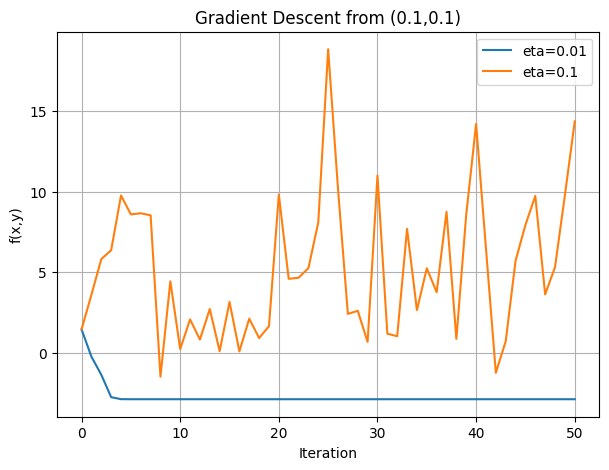

part a results 
eta=0.01: final f=-2.8791 at (x=-0.2418, y=-0.0000)
eta=0.10: final f=14.3620 at (x=1.9616, y=-2.4471)


In [6]:





if __name__ == "__main__":

    # Part (a): Starting point (x0, y0) = (0.1,0.1)
    x0, y0 = 0.1, 0.1
    n_iters = 50  # Number of iterations

    # Case 1: eta = 0.01 (slower learning rate)
    xs1, ys1, fs1 = gradient_descent(x0, y0, eta=0.01, n_iters=n_iters)

    # Case 2: eta = 0.1 (faster learning rate)
    xs2, ys2, fs2 = gradient_descent(x0, y0, eta=0.1, n_iters=n_iters)

    # Part (a) - Plot function value vs iteration for two learning rates
    plt.figure(figsize=(7,5))
    plt.plot(fs1, label="eta=0.01")
    plt.plot(fs2, label="eta=0.1")
    plt.xlabel("Iteration")
    plt.ylabel("f(x,y)")
    plt.title("Gradient Descent from (0.1,0.1)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Part (a) - Print final results after 50 iterations
    print("part a results ")
    print("eta=0.01: final f=%.4f at (x=%.4f, y=%.4f)" 
          % (fs1[-1], xs1[-1], ys1[-1]))
    print("eta=0.10: final f=%.4f at (x=%.4f, y=%.4f)" 
          % (fs2[-1], xs2[-1], ys2[-1]))



For eta 0.01: The function value f(x,y) decreases steadily 
The final fn value is -2.8791 
The gradient descent progresses smooth and stably.

For eta 0.1: Function values drops initially but due to large step size it lands at higher function value at the end
function value is 14.362
this shows algorithm diverged from optimal solution.

In [7]:
# (b) Run gradient descent from multiple starting points
starts = [
    (0.1, 0.1),
    (1.0, 1.0),
    (0.5, 0.5),
    (0.0, 0.5),
    (-0.5, -0.5),
    (-1.0, 1.0),
    ]
eta_b = 0.01  # Learning rate for Part (b)

print("\nPart (b) results (eta=%.3f, %d iterations)" % (eta_b, n_iters))
          
for (sx, sy) in starts:
    xsb, ysb, fsb = gradient_descent(sx, sy, eta=eta_b, n_iters=n_iters)
    min_f  = fsb[-1]
    min_xy = (xsb[-1], ysb[-1])
        
    # Part (b) - Print final results for each starting point
    print("Start (%.1f, %.1f) => final f=%.4f at (%.4f, %.4f)" % (sx, sy, min_f, min_xy[0], min_xy[1]))



Part (b) results (eta=0.010, 50 iterations)
Start (0.1, 0.1) => final f=-2.8791 at (-0.2418, -0.0000)
Start (1.0, 1.0) => final f=-0.9286 at (0.7253, 0.9832)
Start (0.5, 0.5) => final f=-2.6332 at (0.2418, 0.4917)
Start (0.0, 0.5) => final f=-2.6332 at (0.2418, 0.4917)
Start (-0.5, -0.5) => final f=-1.6660 at (-0.7254, -0.4916)
Start (-1.0, 1.0) => final f=1.0052 at (-1.2085, 0.9828)


Results printed above.